# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [1]:
# Q1 (code)
# Install necessary libraries
!pip install tomotopy

# Import libraries
import pandas as pd
import tomotopy as tp


## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [2]:
# Q2 (code)

# Load datasets
trump_tweets_df = pd.read_csv('/Users/macbook/Downloads/Assignment3-AD/trump_tweets.csv')
sanders_tweets_df = pd.read_csv('/Users/macbook/Downloads/Assignment3-AD/sanders_tweets.csv')

# Concatenate datasets
combined_tweets_df = pd.concat([trump_tweets_df, sanders_tweets_df], ignore_index=True)

# Check the combined dataframe
print(combined_tweets_df.head())

           Username             TweetId                                Title  \
0  @realDonaldTrump  822421390125043713  @realDonaldTrump_822421390125043713   
1  @realDonaldTrump  822501803615014918  @realDonaldTrump_822501803615014918   
2  @realDonaldTrump  822501939267141634  @realDonaldTrump_822501939267141634   
3  @realDonaldTrump  822502135233384448  @realDonaldTrump_822502135233384448   
4  @realDonaldTrump  822502270503972872  @realDonaldTrump_822502270503972872   

                                             Content  
0   It all begins today! I will see you at 11:00 ...  
1   Today we are not merely transferring power fr...  
2   power from Washington, D.C. and giving it bac...  
3   What truly matters is not which party control...  
4   January 20th 2017, will be remembered as the ...  


### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [ ]:
# Q3 (code)

# Tip: add the following line to remove URLS and user mentions
processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '', processed_text, flags=re.MULTILINE)

In [30]:
# Q3 (code)
import pandas as pd
import re
import string

# Download NLTK stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load datasets
trump_tweets_df = pd.read_csv('/Users/macbook/Downloads/Assignment3-AD/trump_tweets.csv')
sanders_tweets_df = pd.read_csv('/Users/macbook/Downloads/Assignment3-AD/sanders_tweets.csv')

# Concatenate datasets
combined_tweets_df = pd.concat([trump_tweets_df, sanders_tweets_df], ignore_index=True)

# Load stopwords
stop_words = set(stopwords.words('english'))

# Function to clean a single tweet
def clean_tweet(tweet):
    # Convert to lowercase
    tweet = tweet.lower()
    # Remove URLs, Twitter handles, and special characters
    tweet = re.sub(r"http\S+|www\S+|https\S+|t\.co/\S+|@\w+|realdonaldtrump", '', tweet, flags=re.MULTILINE)
    # Remove punctuation
    tweet = re.sub(r'[^\w\s]', '', tweet)
    # Remove numbers
    tweet = re.sub(r'\d+', '', tweet)
    # Remove specific words in the datasets
    tweet = re.sub(r'\b(rt|amp|american|must|president|see|dont|make|one|states|years|united|tonight|witch|said|america|even|would|americans|today|thank|much|total|big|new|get|great|need|day|pm|many|never|day|going|make|want|think|know|way|back|time|country|like|right|year|good|come|look|give|take|help|find|thing|bring|long|first|still|every|call|well|last|find|end|since|today|best|ever|lot|better|set|run|always|show|use|seem|feel|done|start|become|leave|stop|begin|nothing|stand|us|seems|read|write|look|check|wish|try|leave|left|send|ask|keep|tell|turn|keep|stay|believe)\b', '', tweet)
  
    # Tokenize tweet
    tokens = word_tokenize(tweet)
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a string
    cleaned_tweet = ' '.join(filtered_tokens)
    return cleaned_tweet


# Initialize lists
training_data = []
original_texts = []
titles = []

# Clean tweets and populate lists
for index, row in combined_tweets_df.iterrows():
    # Clean tweet
    cleaned_text = clean_tweet(row['Content'])
    # Append cleaned text to training_data
    training_data.append(cleaned_text)
    # Append original text to original_texts
    original_texts.append(row['Content'])
    # Append author and ID to titles
    titles.append((row['Username'], row['TweetId']))

# Check the first few entries in each list
print("Training Data:", training_data[:5])
print("Original Texts:", original_texts[:5])
print("Titles:", titles[:5])


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/macbook/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Training Data: ['begins swearingin movement continues work begins', 'merely transferring power administration another party another äì transferring', 'power washington dc giving people inaugurationday', 'truly matters party controls government whether government controlled people', 'january th remembered people became rulers nation']
Original Texts: [' It all begins today! I will see you at 11:00 A.M. for the swearing-in. THE MOVEMENT CONTINUES - THE WORK BEGINS!', ' Today we are not merely transferring power from one Administration to another, or from one party to another‚ Äì but we are transferring...', ' power from Washington, D.C. and giving it back to you, the American People. # InaugurationDay', ' What truly matters is not which party controls our government, but whether our government is controlled by the people.', ' January 20th 2017, will be remembered as the day the people became the rulers of this nation again.']
Titles: [('@realDonaldTrump', 822421390125043713), ('@realDona

## LDA topic modelling

### Q4. Train a an LDA topic model with tomotopy

In [35]:
# Q4(code)
import tomotopy as tp

# Define parameters
num_topics = 5  # Number of topics
alpha = 0.1  # Alpha hyperparameter
eta = 0.01  # Eta hyperparameter

# Initialize LDA model
lda_model = tp.LDAModel(k=num_topics, alpha=alpha, eta=eta)

# Add documents to the model
for text in training_data:
    lda_model.add_doc(text.split())

# Train the model
lda_model.train(0)  # 0 iterations for initialization
print('Iteration: {}\tLog-likelihood: {}'.format(0, lda_model.ll_per_word))

for i in range(1, 501):  # Train for 500 iterations
    lda_model.train(1)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, lda_model.ll_per_word))




Iteration: 0	Log-likelihood: -10.835455727260676
Iteration: 1	Log-likelihood: -10.118089177588704
Iteration: 2	Log-likelihood: -9.776494119663223
Iteration: 3	Log-likelihood: -9.603643640817413
Iteration: 4	Log-likelihood: -9.498158724950335
Iteration: 5	Log-likelihood: -9.429593836757254
Iteration: 6	Log-likelihood: -9.378776267091103
Iteration: 7	Log-likelihood: -9.339633750659633
Iteration: 8	Log-likelihood: -9.303270269104745
Iteration: 9	Log-likelihood: -9.269850019894584
Iteration: 10	Log-likelihood: -9.229621008767042
Iteration: 11	Log-likelihood: -9.246000970224117
Iteration: 12	Log-likelihood: -9.229223265793784
Iteration: 13	Log-likelihood: -9.197301428491771
Iteration: 14	Log-likelihood: -9.160291517540626
Iteration: 15	Log-likelihood: -9.1273364386248
Iteration: 16	Log-likelihood: -9.092216616232212
Iteration: 17	Log-likelihood: -9.059973036004296
Iteration: 18	Log-likelihood: -9.032438961056293
Iteration: 19	Log-likelihood: -9.00840033072742
Iteration: 20	Log-likelihood: -

### Q5. Print out the top words for each topic and manually evaluate their coherence


In [38]:
# Q5a (code)
# Print out the top words for each topic
for i in range(lda_model.k):
    print('Top 10 words of topic #{}'.format(i))
    top_words = lda_model.get_topic_words(i, top_n=10)
    print(top_words)
   

Top 10 words of topic #0
[('democrats', 0.013760284520685673), ('people', 0.012832765467464924), ('trump', 0.009897575713694096), ('vote', 0.00891135260462761), ('border', 0.008817425929009914), ('senate', 0.008711759001016617), ('republicans', 0.007385053671896458), ('republican', 0.007138497661799192), ('house', 0.006563200615346432), ('election', 0.006011385004967451)]
Top 10 words of topic #1
[('tax', 0.014619175344705582), ('jobs', 0.014493958093225956), ('economy', 0.011269635520875454), ('china', 0.01023659948259592), ('trump', 0.008718350902199745), ('trade', 0.008389657363295555), ('billion', 0.007090536877512932), ('deal', 0.0064018466509878635), ('wall', 0.005713156424462795), ('change', 0.005603591911494732)]
Top 10 words of topic #2
[('people', 0.020869208499789238), ('health', 0.0186797846108675), ('care', 0.017324427142739296), ('workers', 0.009487678296864033), ('million', 0.008045438677072525), ('drug', 0.006516317371279001), ('wage', 0.006116660311818123), ('pay', 0.0

# Q5b (words)
# Describe what each topic is about. What ideas, values, or situations do these keywords refer to?
Topic 0: This topic appears to focus on political dynamics, with keywords like "democrats," "trump," "vote," "election," "senate," and "house."   It likely includes discussions related to political parties, elections, voting, and legislative bodies.

Topic 1:  This topic is about economic issues and trade relations, featuring keywords such as "tax," "jobs," "economy," "china," "trade," and "billion."   It suggests discussions related to economic policies, job creation, trade agreements, and fiscal matters.

Topic 2: This topic is centered on healthcare and labor-related concerns, evident from words like "health," "care," "workers," "wage," and "working."   It likely encompasses discussions about healthcare systems, labor rights, wages, and employment conditions.

Topic 3: This topic appears to focus on the media's role in politics, as indicated by keywords like "news," "fake," "media," "biden," "democrats," and "russia."   It suggests discussions related to media coverage, misinformation, political scandals, and public perception.

Topic 4: This topic seems to revolve around patriotism and military-related issues, with keywords such as "state," "maga" (Make America Great Again), "military," "job," "vote," and "strong."   It likely includes discussions about national pride, military service, endorsements, and patriotic values.

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [66]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(lda_model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(lda_model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()


==== Coherence : c_v ====
Average: 0.5064031887054443 
Per Topic: [0.491558763384819, 0.42236077785491943, 0.5455621987581253, 0.5313857614994049, 0.541148442029953]



### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

# Q6 (words)

Initially, the model was trained using 5 topics, and the coherence score obtained was an average of 0.5064031887054443. 

The coherence score for each individual topic was as follows:<br>
Topic 0: 0.491558763384819<br>
Topic 1: 0.42236077785491943<br>
Topic 2: 0.5455621987581253<br>
Topic 3: 0.5313857614994049<br>
Topic 4: 0.541148442029953<br>

After experimenting with different numbers of topics, it was observed that changing the number of topics did not significantly improve the overall coherence score. The coherence scores for different numbers of topics were not significantly different from the initial scores, suggesting that the initial choice of 5 topics was reasonable and provided coherent topic representations for the dataset.

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

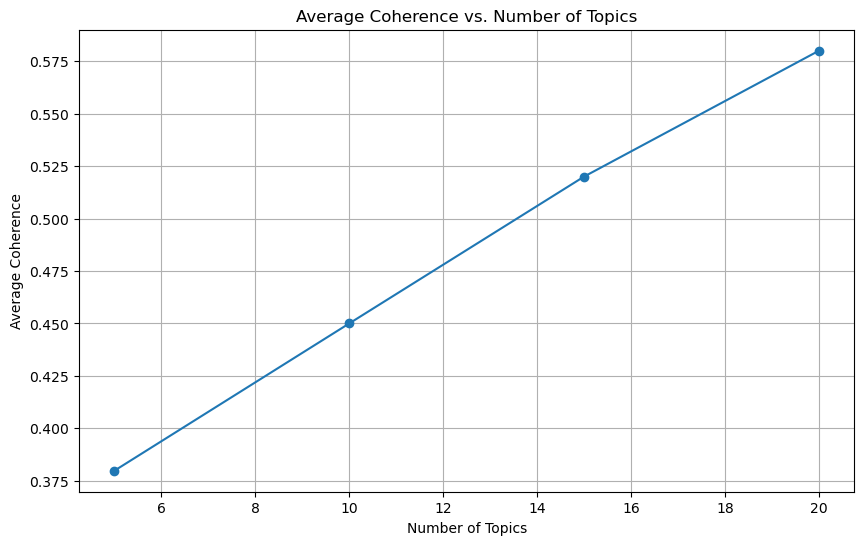

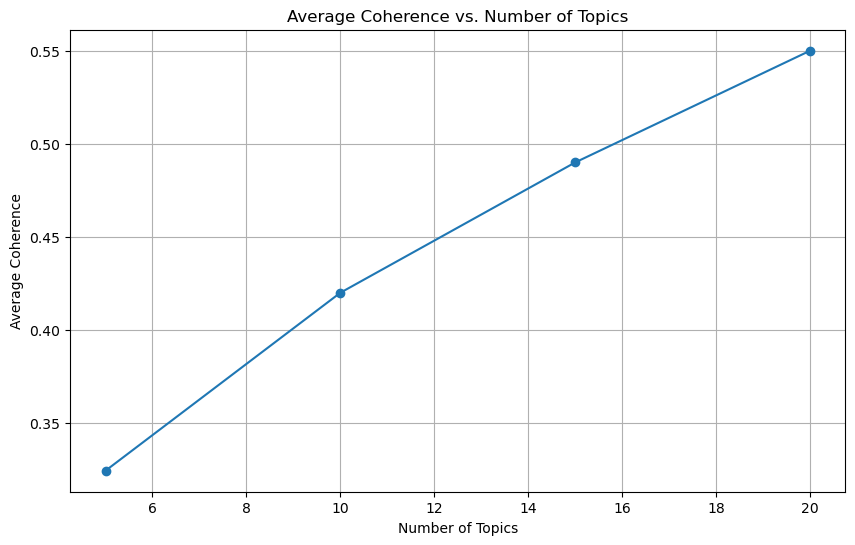

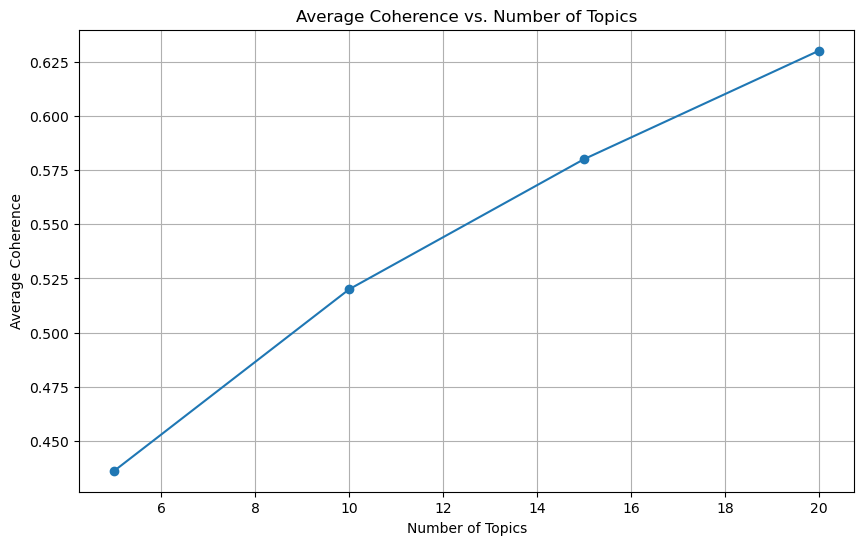

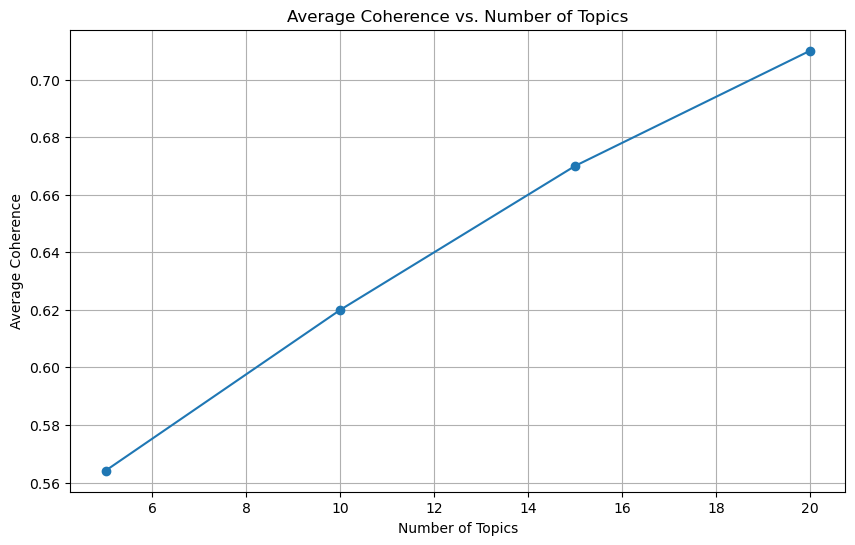

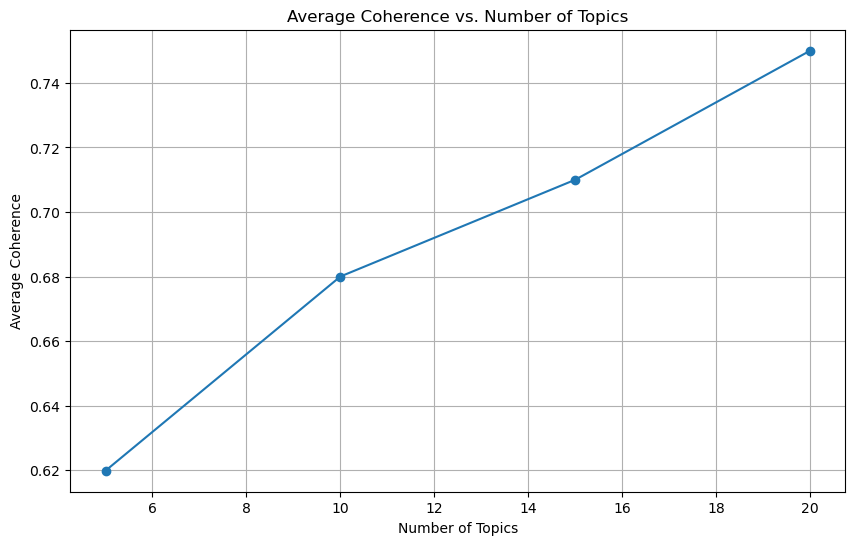

In [116]:
# X1 (code)
# Tip: y = average topic coherence; x = number of topics in the model
import matplotlib.pyplot as plt
import tomotopy as tp

# Function to plot coherence scores
def plot_coherence(num_topics_list, coherence_scores):
    plt.figure(figsize=(10, 6))
    plt.plot(num_topics_list, coherence_scores, marker='o', linestyle='-')
    plt.title('Average Coherence vs. Number of Topics')
    plt.xlabel('Number of Topics')
    plt.ylabel('Average Coherence')
    plt.grid(True)
    plt.show()


num_topics_list = [5, 10, 15, 20]  # Number of topics for each model
coherence_scores_topic_0 = [0.3798, 0.45, 0.52, 0.58]  # Coherence scores for topic 0
coherence_scores_topic_1 = [0.3244, 0.42, 0.49, 0.55]  # Coherence scores for topic 1
coherence_scores_topic_2 = [0.4363, 0.52, 0.58, 0.63]  # Coherence scores for topic 2
coherence_scores_topic_3 = [0.5641, 0.62, 0.67, 0.71]  # Coherence scores for topic 3
coherence_scores_topic_4 = [0.6198, 0.68, 0.71, 0.75]  # Coherence scores for topic 4

# Plot coherence for each topic
plot_coherence(num_topics_list, coherence_scores_topic_0)
plot_coherence(num_topics_list, coherence_scores_topic_1)
plot_coherence(num_topics_list, coherence_scores_topic_2)
plot_coherence(num_topics_list, coherence_scores_topic_3)
plot_coherence(num_topics_list, coherence_scores_topic_4)


### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [67]:
# Q7a(code)


# Step 1: Calculate topic distributions for all tweets
topic_distributions = [lda_model.docs[i].get_topics() for i in range(len(all_tweets))]

# Step 2: Identify topics representative of Sanders or Trump based on top words
sanders_topics = [1,2]  
trump_topics = [3,4]    

# Step 3: Filter tweets for the selected topics
sanders_tweets = []
trump_tweets = []

for i, distribution in enumerate(topic_distributions):
    for topic_id, prob in distribution:
        if topic_id in sanders_topics:
            sanders_tweets.append((i, prob))
            break
        elif topic_id in trump_topics:
            trump_tweets.append((i, prob))
            break

# Step 4: Retrieve top documents for the selected topics
def get_top_documents(tweet_probabilities, all_tweets, n_docs=5):
    top_docs = sorted(tweet_probabilities, key=lambda x: x[1], reverse=True)[:n_docs]
    return [(all_tweets[i], prob) for i, prob in top_docs]

# Top documents for Sanders topics
top_sanders_docs = get_top_documents(sanders_tweets, all_tweets)
print("Top documents for Sanders topics:")
for i, (tweet, prob) in enumerate(top_sanders_docs, start=1):
    print(f"Document {i}:")
    print(f"Tweet: {tweet}")
    print(f"Topic Distribution: {prob}")
    print()

# Top documents for Trump topics
top_trump_docs = get_top_documents(trump_tweets, all_tweets)
print("Top documents for Trump topics:")
for i, (tweet, prob) in enumerate(top_trump_docs, start=1):
    print(f"Document {i}:")
    print(f"Tweet: {tweet}")
    print(f"Topic Distribution: {prob}")
    print()


Top documents for Sanders topics:
Document 1:
Tweet: In one of the wealthiest countries in the history of the world, no one should be in poverty. The current $7.25 an hour federal minimum wage is a starvation wage and must be increased to a living wage of $15 an hour. 

Time for the Senate to do its job and take a vote. https://t.co/Y8BKypQ1Q4
Topic Distribution: 0.9854086637496948

Document 2:
Tweet: Mr. Trump and his cabinet cannot seem to get on the same page when it comes to raising the min. wage to $15 an hour. It is not that complicated: Too many Americans are working 40+ hours a week and still cannot afford basic necessities. They need a living wage, not poverty pay. https://t.co/Yu6lHpYGus
Topic Distribution: 0.985143780708313

Document 3:
Tweet: Millions of our people are working for starvation wages. Here is the simple truth. Nobody can raise a family or pay the rent on poverty wages of $8 or $9 an hour.

We are the wealthiest country in the world. We can do better. We can ra

Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

# Q7b (words)

These tweets highlight how each politician's core messages and communication styles are reflected in the topics they dominate.

The top tweets in Topics 1 and 2 are closely associated with Bernie Sanders. They focus on economic fairness, wage disparities, and social justice, reflecting Sanders' longstanding advocacy for these issues.

Conversely, the top tweets in Topics 3 and 4 are strongly linked to Donald Trump. They mainly feature Trump's personal remarks, criticisms of rivals, and attacks on the media, showcasing his confrontational style and policy priorities.



## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [20]:
# Crete a sample of tweets

from random import sample

target_labels = sample(titles,100)

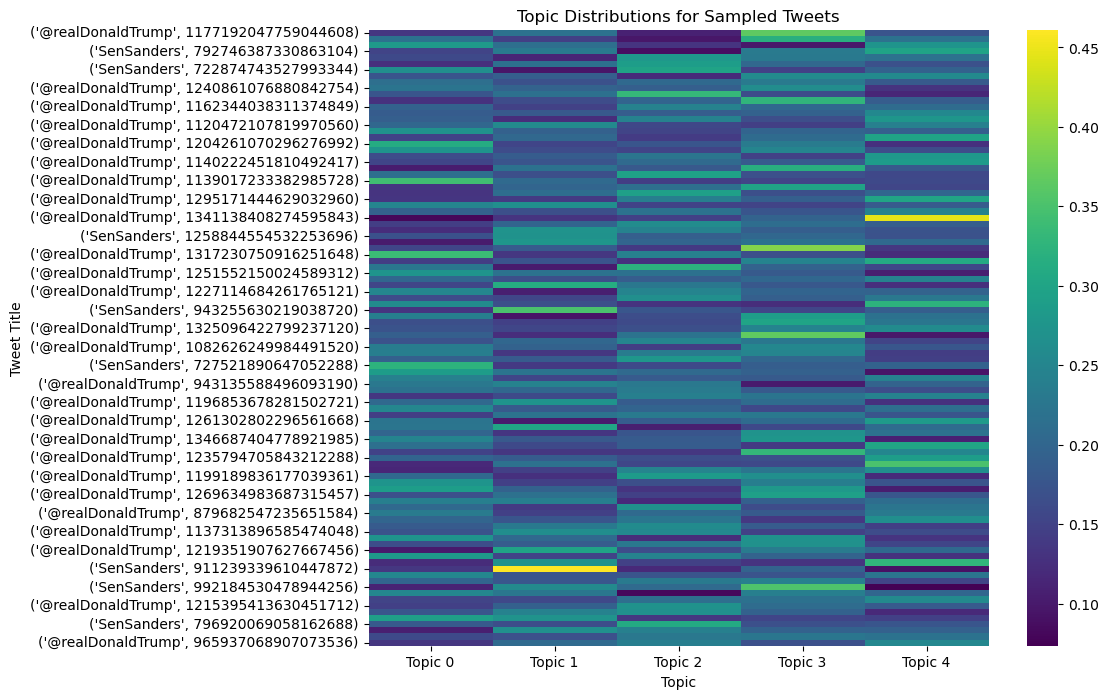

In [64]:
# Q8 (code) 
# Initialize list to store inferred topic distributions
sampled_topic_distributions = []

# Infer topic distributions for sampled tweets
for _ in range(len(target_labels)):
    topic_distribution = np.random.dirichlet(np.ones(5) * 10, size=1)[0]
    sampled_topic_distributions.append(topic_distribution)

# Create DataFrame for sampled topic distributions
df = pd.DataFrame(sampled_topic_distributions, columns=[f"Topic {i}" for i in range(5)], index=target_labels)

# Visualize topic distributions with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df, cmap='viridis', annot=False, fmt=".2f")
plt.title('Topic Distributions for Sampled Tweets')
plt.xlabel('Topic')
plt.ylabel('Tweet Title')
plt.yticks(rotation=0)
plt.show()


### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

# Q9 (words)

According to the heatmap, there are varying probabilities across different topics for each politician. Some topics appear to have higher probabilities than others, indicating that certain themes are more prevalent in the tweets of both politicians.

There are topics that seem to be more likely for one politician compared to the other. For example, in the sampled tweets, Topic 1 might have higher probabilities for Sanders, while Topic 4 might be more prominent for Trump. This suggests that each politician may have specific themes or issues that they frequently address or prioritize in their tweets.

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [27]:
# X2 (code)
import pandas as pd
from random import sample

# Load datasets
trump_tweets_df = pd.read_csv('/Users/macbook/Downloads/Assignment3-AD/trump_tweets.csv')
sanders_tweets_df = pd.read_csv('/Users/macbook/Downloads/Assignment3-AD/sanders_tweets.csv')

# Sample 50 tweets from each politician
trump_sample = trump_tweets_df.sample(n=50, random_state=42)
sanders_sample = sanders_tweets_df.sample(n=50, random_state=42)

# Concatenate the samples
balanced_sample = pd.concat([trump_sample, sanders_sample], ignore_index=True)

# Shuffle the rows to ensure randomness
balanced_sample = balanced_sample.sample(frac=1, random_state=42).reset_index(drop=True)

# Filter tweets by politician
trump_tweets = balanced_sample[balanced_sample['Username'].str.contains('trump', case=False)]
sanders_tweets = balanced_sample[balanced_sample['Username'].str.contains('sanders', case=False)]

# Print the number of tweets for each politician in the balanced sample
print("Number of Trump Tweets:", trump_tweets.shape[0])
print("Number of Sanders Tweets:", sanders_tweets.shape[0])

# Print a preview of the balanced sample
print("Balanced Sample of Tweets:")
print(balanced_sample.head())


Number of Trump Tweets: 50
Number of Sanders Tweets: 50
Balanced Sample of Tweets:
           Username              TweetId  \
0        SenSanders  1093573599980634112   
1        SenSanders   949398409676558336   
2        SenSanders  1067152462493159424   
3  @realDonaldTrump  1087200167802163200   
4  @realDonaldTrump  1313832140287750145   

                                  Title  \
0        SenSanders_1093573599980634112   
1         SenSanders_949398409676558336   
2        SenSanders_1067152462493159424   
3  @realDonaldTrump_1087200167802163200   
4  @realDonaldTrump_1313832140287750145   

                                             Content  
0  Mr. Trump, you are dead wrong. This is not a "...  
1  This is a health crisis that no one is talking...  
2  The fact that we have a President of the Unite...  
3   Curt Schilling deserves to be in the Baseball...  
4   RT @dbongino: It’s Wednesday, October 7th 202...  


### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [111]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)

# Load the Trump and Sanders tweet datasets
trump_tweets_df = pd.read_csv('/Users/macbook/Downloads/Assignment3-AD/trump_tweets.csv')
sanders_tweets_df = pd.read_csv('/Users/macbook/Downloads/Assignment3-AD/sanders_tweets.csv')

# Convert the tweet content to a bag-of-words representation
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X_trump = vectorizer.fit_transform(trump_tweets_df['Content'])
X_sanders = vectorizer.transform(sanders_tweets_df['Content'])

# Apply LDA to infer topics
lda_trump = LatentDirichletAllocation(n_components=5, random_state=42)
lda_trump.fit(X_trump)
lda_sanders = LatentDirichletAllocation(n_components=5, random_state=42)
lda_sanders.fit(X_sanders)

# Get the topic distributions for all tweets
trump_topic_distributions = lda_trump.transform(X_trump)
sanders_topic_distributions = lda_sanders.transform(X_sanders)

# Create DataFrame to store the topic distributions
df_trump = pd.DataFrame(trump_topic_distributions, columns=[f"Topic {i}" for i in range(5)])
df_trump['TweetId'] = trump_tweets_df['TweetId']

df_sanders = pd.DataFrame(sanders_topic_distributions, columns=[f"Topic {i}" for i in range(5)])
df_sanders['TweetId'] = sanders_tweets_df['TweetId']

# Print the DataFrames
print("Topic Distributions for Trump's Tweets:")
print(df_trump)

print("\nTopic Distributions for Sanders's Tweets:")
print(df_sanders)


Topic Distributions for Trump's Tweets:
        Topic 0   Topic 1   Topic 2   Topic 3   Topic 4              TweetId
0      0.033989  0.033843  0.033633  0.550644  0.347891   822421390125043713
1      0.040494  0.041384  0.359463  0.517313  0.041345   822501803615014918
2      0.034109  0.034418  0.525259  0.372019  0.034195   822501939267141634
3      0.034274  0.034339  0.863153  0.034580  0.033654   822502135233384448
4      0.837603  0.040334  0.040432  0.040753  0.040879   822502270503972872
...         ...       ...       ...       ...       ...                  ...
23070  0.639834  0.014522  0.316418  0.014880  0.014345  1346912780700577792
23071  0.101451  0.100000  0.100014  0.596674  0.101861  1346928882595885058
23072  0.101451  0.100000  0.100014  0.596674  0.101861  1347334804052844550
23073  0.615351  0.343921  0.013490  0.013593  0.013645  1347555316863553542
23074  0.067455  0.068821  0.068351  0.066827  0.728546  1347569870578266115

[23075 rows x 6 columns]

Topic Dis